In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Read data from CSV files
mapper_GB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-GB_letterFrequencyCombiner_results.csv')
InMapping_GB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-GB_letterFrequencyInMapping_results.csv')

mapper_MB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-MB_letterFrequencyCombiner_results.csv')
InMapping_MB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-MB_letterFrequencyInMapping_results.csv')

mapper_KB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-KB_letterFrequencyCombiner_results.csv')
InMapping_KB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-KB_letterFrequencyInMapping_results.csv')


# Add a column to indicate the phase (mapper or reducer) 
mapper_GB_data['Phase'] = 'Mapper'
InMapping_GB_data['Phase'] = 'InMapping'

mapper_MB_data['Phase'] = 'Mapper'
InMapping_MB_data['Phase'] = 'InMapping'

mapper_KB_data['Phase'] = 'Mapper'
InMapping_KB_data['Phase'] = 'InMapping'


# Merge the dataframes for each file size
combined_GB_data = pd.concat([mapper_GB_data, InMapping_GB_data])

combined_MB_data = pd.concat([mapper_MB_data, InMapping_MB_data])

combined_KB_data = pd.concat([mapper_KB_data, InMapping_KB_data])

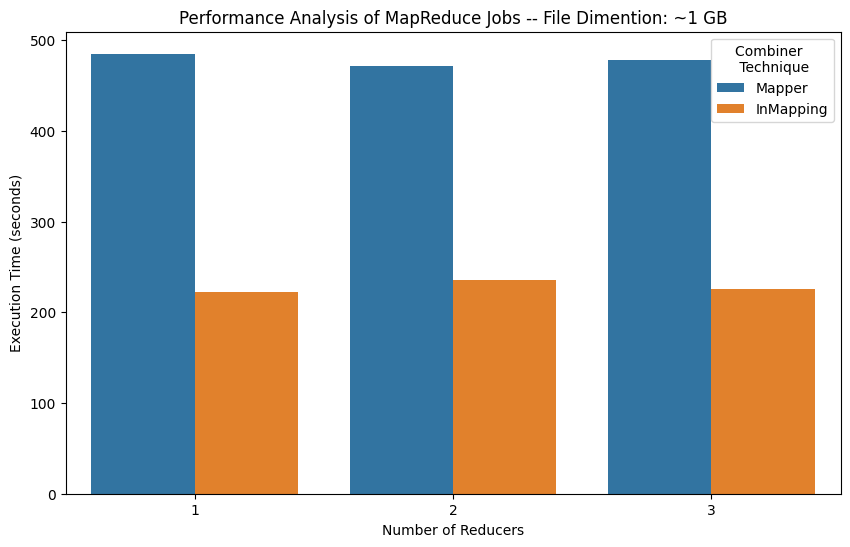

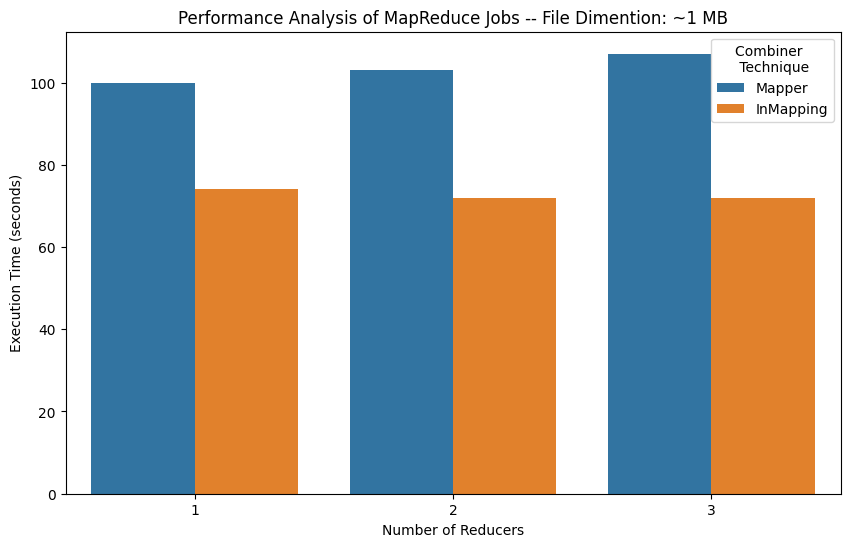

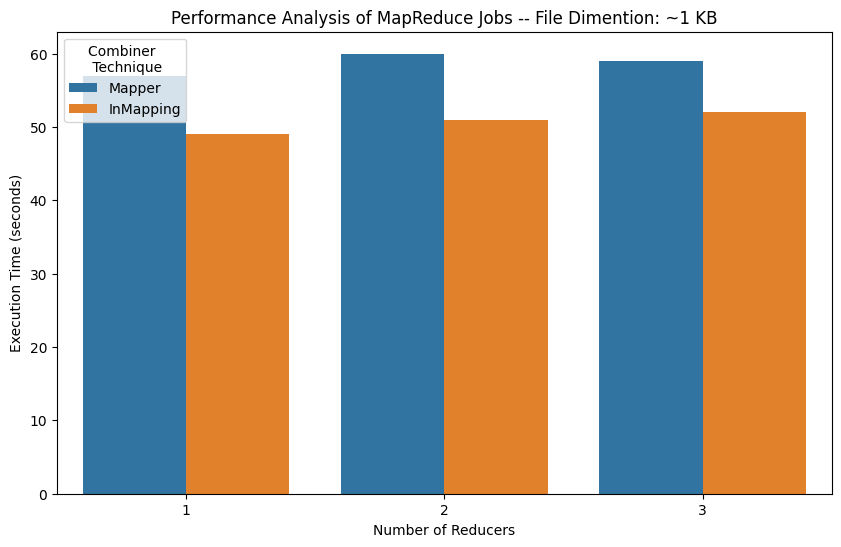

In [3]:
df_collection = [combined_GB_data, combined_MB_data, combined_KB_data]

# Plot the data in three different plots
i = 0
for df in df_collection:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='NumReducers', y='ExecutionTime', data=df, hue='Phase')
    if i == 0:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 GB')
    elif i == 1:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 MB')
    else:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 KB')
    plt.ylabel('Execution Time (seconds)')
    plt.xlabel('Number of Reducers')
    plt.legend(title='Combiner \n Technique')
    i += 1
    plt.show()